## Predict Restaurant Ratings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

data=pd.read_csv("dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [3]:
data.shape

(4411, 21)

In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
irrelevant_columns=["Restaurant ID","Restaurant Name","Address"]
data_clean=data.drop(columns=irrelevant_columns)

In [6]:
data_types = data_clean.dtypes
data_types

Country Code              int64
City                     object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object

In [7]:
data_clean.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,4411.000000,4411.000000,4411.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,27.181818,55.460764,25.883016,614.488209,1.948753,2.979365,230.257596
std,69.104814,54.476653,10.474276,611.360475,0.931593,1.398345,565.640599
min,1.000000,-157.948486,-38.634746,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.030923,28.434707,250.000000,1.000000,2.800000,10.000000
50%,1.000000,77.117637,28.532966,450.000000,2.000000,3.400000,52.000000
75%,1.000000,77.239954,28.634623,750.000000,3.000000,3.900000,201.000000
max,216.000000,153.593331,52.008289,7000.000000,4.000000,4.900000,10934.000000


In [8]:
null_value=data_clean.isnull().sum()
null_value

Country Code             0
City                     0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64

In [9]:
data_clean.duplicated().sum()

0

In [10]:
data_clean['Cuisines'].fillna(data_clean['Cuisines'].mode()[0])

0               French, Japanese, Desserts
1                                 Japanese
2         Seafood, Asian, Filipino, Indian
3                          Japanese, Sushi
4                         Japanese, Korean
                       ...                
4406                   Ice Cream, Desserts
4407                   Ice Cream, Desserts
4408    Raw Meats, North Indian, Fast Food
4409        North Indian, Mughlai, Chinese
4410                          North Indian
Name: Cuisines, Length: 4411, dtype: object

In [11]:
data_clean['Average Cost for two'].fillna(data_clean['Average Cost for two'].mean())

0       1100.000000
1       1200.000000
2       4000.000000
3       1500.000000
4       1500.000000
           ...     
4406     400.000000
4407     200.000000
4408     350.000000
4409     500.000000
4410     614.488209
Name: Average Cost for two, Length: 4411, dtype: float64

In [12]:
# Define the list of numerical columns for which you want to detect and handle outliers
numerical_col = ['Aggregate rating', 'Votes', 'Price range', 'Average Cost for two']

# Calculate the first quartile (Q1) and third quartile (Q3) for the numerical columns
Q1 = data_clean[numerical_col].quantile(0.25)  # 25th percentile
Q3 = data_clean[numerical_col].quantile(0.75)  # 75th percentile

# Compute the Interquartile Range (IQR) for each numerical column
IQR = Q3 - Q1

# Filter the data by removing outliers based on the IQR method
# Outliers are defined as values that lie below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
data_clean_2 = data_clean[~((data_clean[numerical_col] < (Q1 - 1.5 * IQR)) | 
                            (data_clean[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Drop any rows that contain missing values (NaN) after removing outliers
data_clean_2 = data_clean_2.dropna()


In [13]:
data_clean_2.isnull().sum()

Country Code            0
City                    0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
data_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 0 to 4409
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          2966 non-null   int64  
 1   City                  2966 non-null   object 
 2   Locality              2966 non-null   object 
 3   Locality Verbose      2966 non-null   object 
 4   Longitude             2966 non-null   float64
 5   Latitude              2966 non-null   float64
 6   Cuisines              2966 non-null   object 
 7   Average Cost for two  2966 non-null   float64
 8   Currency              2966 non-null   object 
 9   Has Table booking     2966 non-null   object 
 10  Has Online delivery   2966 non-null   object 
 11  Is delivering now     2966 non-null   object 
 12  Switch to order menu  2966 non-null   object 
 13  Price range           2966 non-null   float64
 14  Aggregate rating      2966 non-null   float64
 15  Rating color          2966

In [15]:
data_clean_2.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500.0,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500.0,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0
5,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000.0,Botswana Pula(P),No,No,No,No,3.0,4.4,Green,Very Good,336.0
12,162,Quezon City,"UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",800.0,Botswana Pula(P),No,No,No,No,3.0,4.8,Dark Green,Excellent,294.0


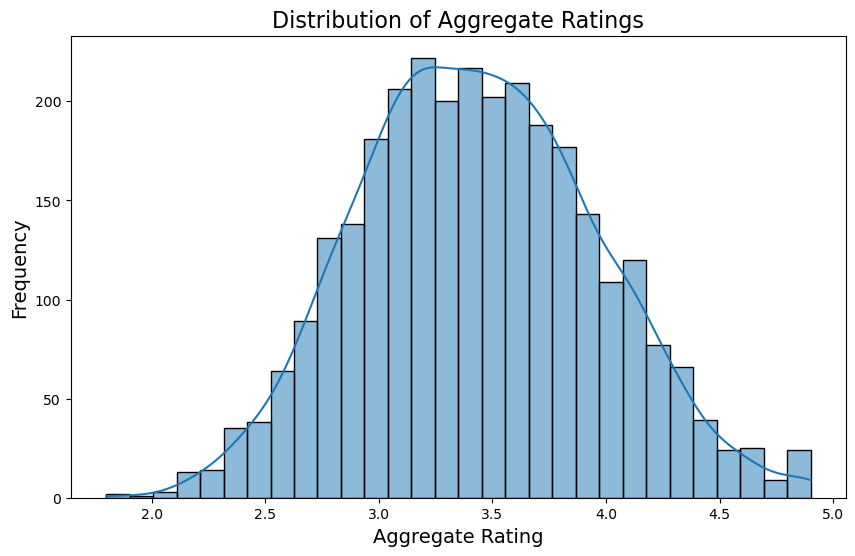

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean_2['Aggregate rating'], kde=True, bins=30)
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

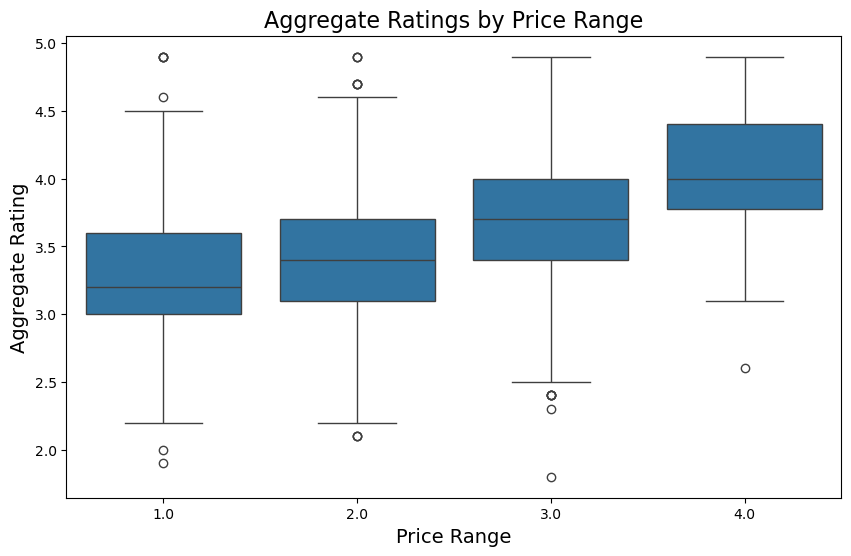

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data_clean_2)
plt.title('Aggregate Ratings by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.show()

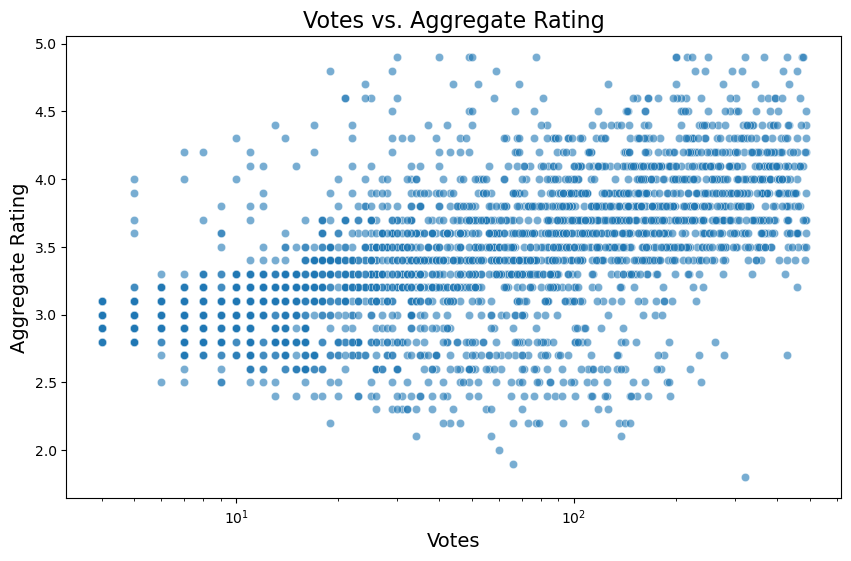

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data_clean_2, alpha=0.6)
plt.title('Votes vs. Aggregate Rating', fontsize=16)
plt.xlabel('Votes', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.xscale('log') 
plt.show()

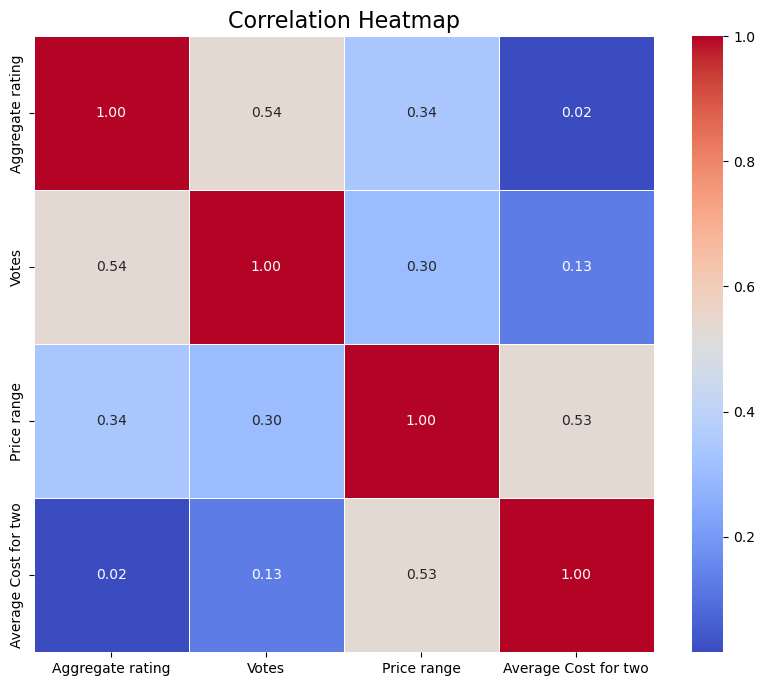

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_clean_2[['Aggregate rating', 'Votes', 'Price range', 'Average Cost for two']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

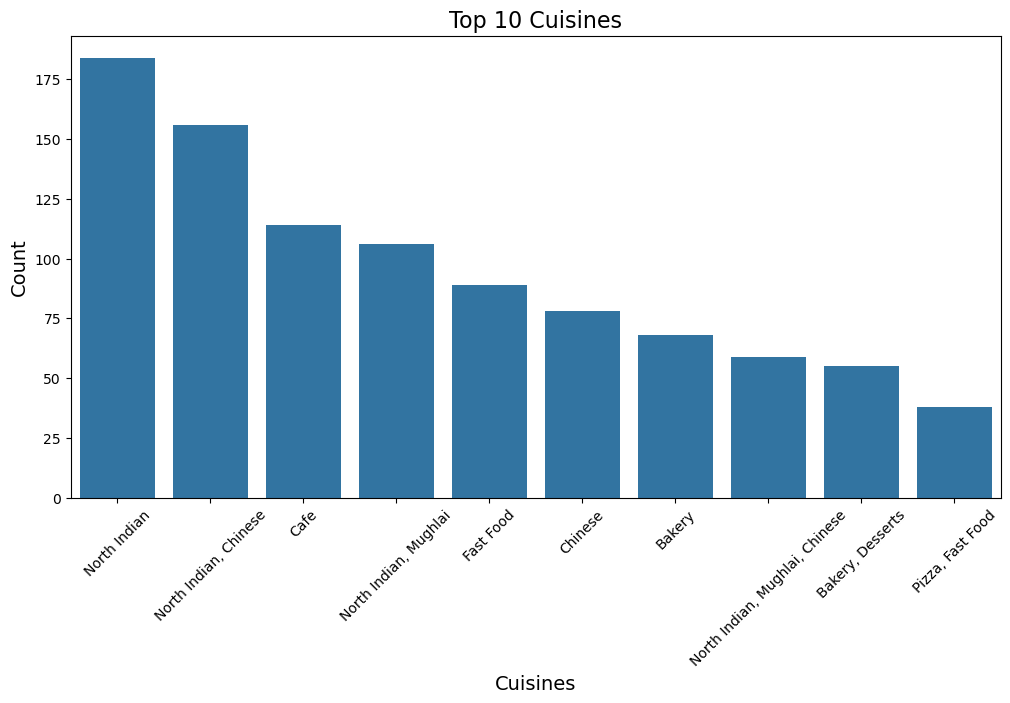

In [20]:
plt.figure(figsize=(12, 6))
top_cuisines = data_clean_2['Cuisines'].value_counts().nlargest(10)  # Top 10 cuisines
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.title('Top 10 Cuisines', fontsize=16)
plt.xlabel('Cuisines', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [21]:
# Categorical columns that need to be encoded
categorical_columns = ['City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency',
                       'Has Table booking', 'Has Online delivery', 'Is delivering now',
                       'Switch to order menu', 'Rating color', 'Rating text']

# One-hot encoding the remaining categorical variables
data_encoded = pd.get_dummies(data_clean_2, columns=categorical_columns, drop_first=True)


In [22]:
# Check for non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(include=['object']).columns
print("Non-numeric columns remaining:", non_numeric_columns)


Non-numeric columns remaining: Index([], dtype='object')


In [23]:
from sklearn.model_selection import train_test_split

# Define the target and features
X = data_encoded.drop('Aggregate rating', axis=1)  # Features
y = data_encoded['Aggregate rating']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (2372, 2097)
Testing data shape: (594, 2097)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.04992186336975932
R-squared: 0.8296675467744993


In [25]:
# Coefficients of the features
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))  # Top 10 influential features


                                                    Coefficient
Rating text_Excellent                                  0.966069
City_Singapore                                         0.557434
Cuisines_Continental, Juices, Cafe, Desserts, S...     0.529738
Cuisines_Mexican, North Indian, European, Chine...     0.507192
Cuisines_North Indian, Seafood, Continental            0.465320
Cuisines_Asian, Chinese, Tibetan                       0.450749
Cuisines_German, Ice Cream                             0.438754
Cuisines_Continental, Italian, Mexican                 0.437370
Cuisines_North Indian, Italian, Parsi, Asian, K...     0.424507
Cuisines_Continental, Italian, North Indian, Mu...     0.421063


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE and R-squared
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')


Decision Tree Mean Squared Error: 0.06244107744107742
Decision Tree R-squared: 0.7869522252443626


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 0.0365861902356902
Random Forest R-squared: 0.8751686111781846


                    Feature  Importance
2090    Rating color_Orange    0.503254
2091       Rating color_Red    0.114399
2095       Rating text_Poor    0.087430
2092    Rating color_Yellow    0.067258
2094       Rating text_Good    0.055667
5                     Votes    0.025752
1                 Longitude    0.020585
2                  Latitude    0.016259
3      Average Cost for two    0.010676
2096  Rating text_Very Good    0.007795


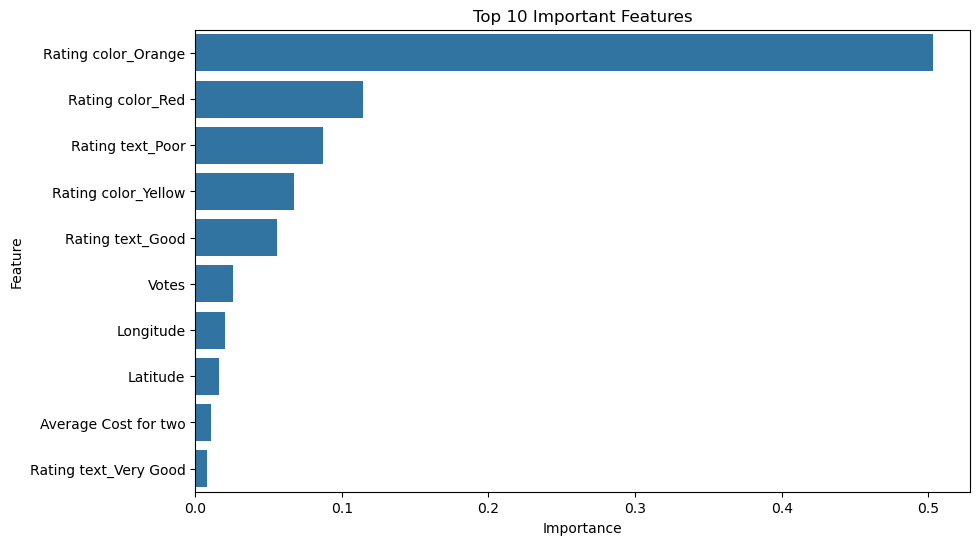

In [28]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(feature_importance_df.head(10))

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()


In [29]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

# To load the model in the future
# rf_model = joblib.load('random_forest_model.pkl')


['random_forest_model.pkl']